In [2]:
import pandas as pd
import yfinance as yf
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import getFamaFrenchFactors as gff
import seaborn as sns



In [3]:
end = dt.datetime.now()
start = dt.datetime(end.year - 6,end.month,end.day)
ticker = ['TSLA']

In [4]:
end

datetime.datetime(2024, 5, 14, 16, 10, 39, 104513)

In [5]:
start

datetime.datetime(2018, 5, 14, 0, 0)

In [6]:
tsla = yf.download(ticker, start, end, progress = False)

In [7]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-14,20.221333,20.329332,19.441334,19.464666,19.464666,109302000
2018-05-15,19.000668,19.130667,18.700001,18.945333,18.945333,142788000
2018-05-16,18.922001,19.254000,18.770666,19.098667,19.098667,85110000
2018-05-17,19.059999,19.279333,18.931334,18.969334,18.969334,66309000
2018-05-18,18.976667,18.976667,18.266666,18.454666,18.454666,108778500


In [8]:
tsla =tsla.drop(['Open','High','Low','Close','Volume'], axis = 1)

In [9]:
tsla.head()

,Adj Close
Date,
2018-05-14,19.464666
2018-05-15,18.945333
2018-05-16,19.098667
2018-05-17,18.969334
2018-05-18,18.454666


In [10]:
tsla = tsla.resample("M").last()
tsla.head()

/var/folders/1j/320f0y9s42dgwk8ls4nvjfhm0000gn/T/ipykernel_48403/882084045.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tsla = tsla.resample("M").last()


,Adj Close
Date,
2018-05-31,18.982000
2018-06-30,22.863333
2018-07-31,19.875999
2018-08-31,20.110666
2018-09-30,17.651333


In [11]:
tsla['Ret'] = tsla['Adj Close'].pct_change()

tsla

,Adj Close,Ret
Date,,
2018-05-31,18.982000,NaN
2018-06-30,22.863333,0.204474
2018-07-31,19.875999,-0.130660
2018-08-31,20.110666,0.011807
2018-09-30,17.651333,-0.122290
...,...,...
2024-01-31,187.289993,-0.246257
2024-02-29,201.880005,0.077901
2024-03-31,175.789993,-0.129235


In [12]:
tsla.dropna(inplace = True)
tsla

,Adj Close,Ret
Date,,
2018-06-30,22.863333,0.204474
2018-07-31,19.875999,-0.130660
2018-08-31,20.110666,0.011807
2018-09-30,17.651333,-0.122290
2018-10-31,22.488001,0.274011
...,...,...
2024-01-31,187.289993,-0.246257
2024-02-29,201.880005,0.077901
2024-03-31,175.789993,-0.129235


#### Scarichiamo il risk free dal DB di Fama e French

In [13]:
ff3_monthly = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))

In [14]:
ff3_monthly

,date_ff_factors,Mkt-RF,SMB,HML,RF
0,1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1,1926-08-31,0.0264,-0.0117,0.0382,0.0025
2,1926-09-30,0.0036,-0.0140,0.0013,0.0023
3,1926-10-31,-0.0324,-0.0009,0.0070,0.0032
4,1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...,...
1168,2023-11-30,0.0884,-0.0002,0.0164,0.0044
1169,2023-12-31,0.0487,0.0634,0.0493,0.0043
1170,2024-01-31,0.0071,-0.0509,-0.0238,0.0047
1171,2024-02-29,0.0506,-0.0024,-0.0349,0.0042


In [15]:
ff3_monthly.columns

Index(['date_ff_factors', 'Mkt-RF', 'SMB', 'HML', 'RF'], dtype='object')

In [16]:
ff3_monthly.rename({'date_ff_factors': 'Date'}, axis=1, inplace=True)

In [17]:
ff3_monthly.head()

,Date,Mkt-RF,SMB,HML,RF
0,1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1,1926-08-31,0.0264,-0.0117,0.0382,0.0025
2,1926-09-30,0.0036,-0.0140,0.0013,0.0023
3,1926-10-31,-0.0324,-0.0009,0.0070,0.0032
4,1926-11-30,0.0253,-0.0010,-0.0051,0.0031


In [18]:
ff3_monthly.set_index('Date', inplace = True)

In [19]:
ff3_monthly.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-31,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031


#### Combiniamo i DF di FF con quello di Tesla

In [20]:
data = ff3_monthly.merge(tsla, on = 'Date')

In [21]:
data

,Mkt-RF,SMB,HML,RF,Adj Close,Ret
Date,,,,,,
2018-06-30,0.0048,0.0114,-0.0234,0.0014,22.863333,0.204474
2018-07-31,0.0319,-0.0222,0.0047,0.0016,19.875999,-0.130660
2018-08-31,0.0344,0.0114,-0.0394,0.0016,20.110666,0.011807
2018-09-30,0.0006,-0.0227,-0.0170,0.0015,17.651333,-0.122290
2018-10-31,-0.0768,-0.0478,0.0340,0.0019,22.488001,0.274011
...,...,...,...,...,...,...
2023-11-30,0.0884,-0.0002,0.0164,0.0044,240.080002,0.195379
2023-12-31,0.0487,0.0634,0.0493,0.0043,248.479996,0.034988
2024-01-31,0.0071,-0.0509,-0.0238,0.0047,187.289993,-0.246257


In [22]:
data.shape

(70, 6)

In [23]:
data = data.tail(60)
data

,Mkt-RF,SMB,HML,RF,Adj Close,Ret
Date,,,,,,
2019-04-30,0.0397,-0.0174,0.0215,0.0021,15.912667,-0.147109
2019-05-31,-0.0694,-0.0132,-0.0237,0.0021,12.344000,-0.224266
2019-06-30,0.0693,0.0029,-0.0071,0.0018,14.897333,0.206848
2019-07-31,0.0119,-0.0193,0.0048,0.0019,16.107332,0.081223
2019-08-31,-0.0258,-0.0238,-0.0478,0.0016,15.040667,-0.066222
2019-09-30,0.0143,-0.0096,0.0675,0.0018,16.058001,0.067639
2019-10-31,0.0206,0.0029,-0.0191,0.0016,20.994667,0.307427
2019-11-30,0.0387,0.0077,-0.0202,0.0012,21.996000,0.047695
2019-12-31,0.0277,0.0073,0.0175,0.0014,27.888666,0.267897


#### Calcoliamo il beta di TESLA
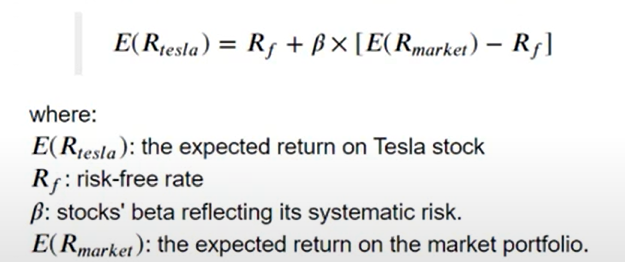

In [24]:
TSLA_excess_ret = data['Ret'] - data['RF']

In [25]:
data['TSLA-RF'] = TSLA_excess_ret

/var/folders/1j/320f0y9s42dgwk8ls4nvjfhm0000gn/T/ipykernel_48403/4141911768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TSLA-RF'] = TSLA_excess_ret


In [26]:
data.head()

,Mkt-RF,SMB,HML,RF,Adj Close,Ret,TSLA-RF
Date,,,,,,,
2019-04-30,0.0397,-0.0174,0.0215,0.0021,15.912667,-0.147109,-0.149209
2019-05-31,-0.0694,-0.0132,-0.0237,0.0021,12.344000,-0.224266,-0.226366
2019-06-30,0.0693,0.0029,-0.0071,0.0018,14.897333,0.206848,0.205048
2019-07-31,0.0119,-0.0193,0.0048,0.0019,16.107332,0.081223,0.079323
2019-08-31,-0.0258,-0.0238,-0.0478,0.0016,15.040667,-0.066222,-0.067822


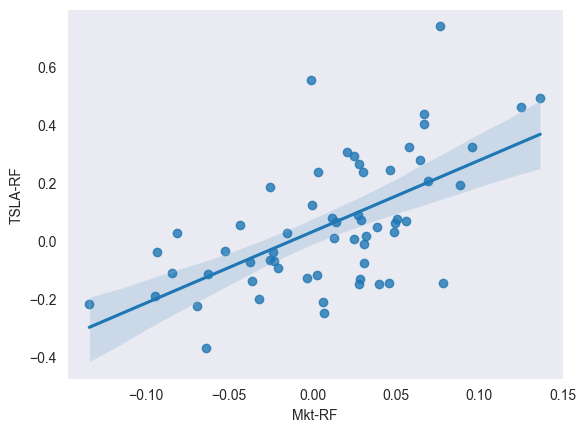

In [27]:
sns.regplot(x = 'Mkt-RF', y='TSLA-RF', data = data)
plt.grid()

In [28]:
X = data['Mkt-RF']
y = data['TSLA-RF']
X1 = sm.add_constant(X)

In [29]:
model = sm.OLS(y,X1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TSLA-RF   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     33.15
Date:                Tue, 14 May 2024   Prob (F-statistic):           3.41e-07
Time:                        16:10:40   Log-Likelihood:                 18.503
No. Observations:                  60   AIC:                            -33.01
Df Residuals:                      58   BIC:                            -28.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.024      1.305      0.197      -0.017       0.079
Mkt-RF         2.4645      0.428      5.758      0.000       1.608       3.321
==============================================================================
Omnibus:                        5.006   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.076
Skew:                           0.503   Prob(JB):                        0.130
Kurtosis:                       3.787   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
intercept, beta = results.params

In [31]:
intercept

0.031098071568590943

In [32]:
beta

2.4644657353738677

#### Calcoliamo il rendimento atteso di TESLA

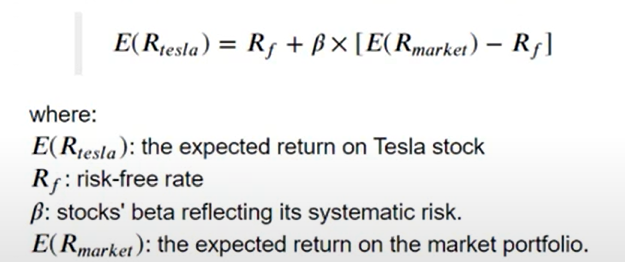

In [33]:
# Per il risk free prendiamo il tasso a breve corrente non quello passato. 5% diviso 12 pari a 0,417%
risk_free = 0.00417

In [34]:
# Per il mercato possiamo prendere o la nostra stima o una media di lungo periodo. Ipotizziamo 7% diviso 12 pari a 0,5%
market_premium = 0.0058

In [35]:
# Se prendiamo la media recente viene un numero altissimo
data['Mkt-RF'].mean()*12

0.13357999999999995

In [36]:
# Rendimento atteso di TESLA
TESLA_exp_ret = risk_free + beta*market_premium
TESLA_exp_ret


0.018463901265168434

In [37]:
TESLA_exp_ret_y = TESLA_exp_ret * 12
TESLA_exp_ret_y

0.2215668151820212